In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/customer_segmentation.csv')
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [3]:
df=df.drop(columns=['Address'], axis = 1)

In [4]:
df.isnull().sum()

Customer Id          0
Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

In [5]:
df.shape

(850, 9)

Normalization and Define X

In [6]:
from sklearn.preprocessing import StandardScaler
import numpy as np

In [7]:
X = df.values[:,1:]
X = np.nan_to_num(X)
cluster_dataset = StandardScaler().fit_transform(X)
cluster_dataset

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 

In [9]:
def fit_x (data, k_start, k_end):
    k_fit = []
    for k in range(k_start, k_end+1):
        km = KMeans(init="k-means++", n_clusters=k, random_state=0).fit(data).labels_
        k_fit.append(km)
    return k_fit

In [10]:
fit_x(cluster_dataset, 1, 10)

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [11]:
from yellowbrick.cluster import KElbowVisualizer

C:\Users\Jey\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [120]:
class _KMeans_():
    def __init__(self, dataset, k_start, k_end):
        self.data = dataset
        self.k_start = k_start
        self.k_end = k_end
        
    def _Distortion(self):
        return KElbowVisualizer(KMeans(), k=(self.k_start, self.k_end)).fit(self.data).show()        
     
    
    def _Calinski_Harabasz(self):
        return KElbowVisualizer(KMeans(), k=(self.k_start, self.k_end), metric='calinski_harabasz',\
        timings=False).fit(self.data).show()
    
    def klabel(self, k):
        return KMeans(init="k-means++", n_clusters=k).fit(self.data).labels_

In [121]:
P1 = _KMeans_(cluster_dataset, 2, 12)
      

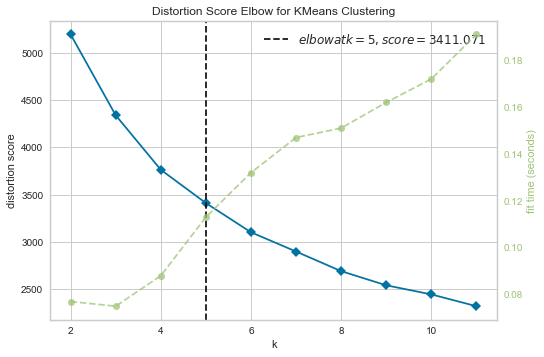

In [96]:
P1._Distortion()

C:\Users\Jey\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\Jey\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\Jey\anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


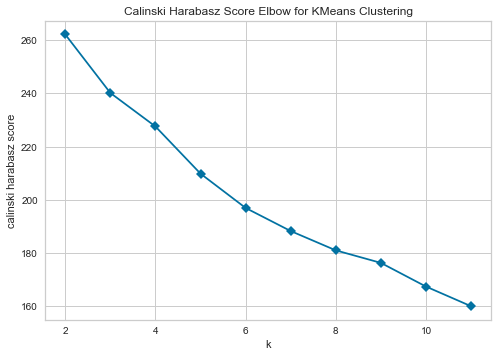

In [98]:
P1._Calinski_Harabasz()

In [122]:
P1.klabel(5)

array([2, 1, 4, 2, 3, 1, 2, 0, 2, 1, 4, 2, 2, 1, 4, 2, 2, 0, 1, 1, 2, 0,
       4, 1, 3, 1, 2, 1, 2, 2, 1, 1, 4, 0, 2, 2, 4, 4, 2, 1, 4, 1, 2, 0,
       2, 1, 2, 2, 2, 2, 1, 1, 4, 1, 4, 4, 4, 0, 1, 1, 1, 1, 1, 1, 2, 2,
       1, 4, 2, 4, 0, 0, 1, 2, 2, 2, 2, 2, 3, 1, 1, 3, 1, 2, 1, 2, 0, 2,
       4, 4, 1, 2, 4, 4, 0, 2, 2, 2, 4, 0, 4, 3, 1, 4, 4, 1, 2, 2, 2, 0,
       1, 0, 2, 4, 2, 2, 2, 1, 1, 2, 2, 2, 0, 1, 2, 1, 2, 2, 2, 2, 2, 1,
       2, 0, 2, 0, 1, 2, 1, 4, 4, 2, 2, 2, 3, 0, 1, 4, 2, 2, 2, 1, 4, 2,
       2, 1, 1, 1, 4, 4, 2, 0, 1, 2, 2, 0, 0, 2, 2, 0, 1, 2, 0, 4, 2, 4,
       1, 2, 4, 1, 4, 2, 2, 3, 4, 4, 2, 2, 1, 0, 2, 1, 0, 4, 1, 0, 2, 1,
       3, 0, 1, 2, 4, 2, 2, 4, 2, 1, 1, 0, 2, 2, 2, 0, 2, 4, 4, 0, 1, 1,
       4, 1, 2, 0, 2, 2, 3, 2, 0, 1, 2, 2, 1, 2, 1, 2, 1, 4, 0, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 0, 0, 2, 0, 2, 2, 1, 4, 1, 4, 2, 2, 2, 0, 1, 4,
       1, 4, 2, 1, 2, 2, 4, 2, 2, 1, 2, 4, 4, 4, 2, 2, 2, 3, 1, 2, 1, 2,
       1, 2, 1, 1, 2, 2, 2, 4, 2, 2, 4, 2, 0, 1, 1,

In [107]:
df['label'] = P1.klabel(5)

In [108]:
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,label
0,1,41,2,6,19,0.124,1.073,0.0,6.3,1
1,2,47,1,26,100,4.582,8.218,0.0,12.8,4
2,3,33,2,10,57,6.111,5.802,1.0,20.9,3
3,4,29,2,4,19,0.681,0.516,0.0,6.3,1
4,5,47,1,31,253,9.308,8.908,0.0,7.2,0


In [112]:
df.groupby(by=['label']).mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
label,,,,,,,,,
0,455.450000,43.325000,2.250000,17.300000,136.925000,8.129825,13.104575,0.593750,19.442500
1,438.567039,32.075419,1.310056,6.055866,29.720670,0.702022,1.538961,0.000000,7.894693
2,411.717391,33.750000,3.489130,5.293478,43.826087,1.164326,2.485087,0.095890,8.829348
3,421.063694,31.783439,1.764331,3.955414,30.783439,1.610318,2.774637,0.993590,14.238854
4,406.231527,41.694581,1.463054,16.320197,72.374384,1.989369,4.323054,0.012739,9.823153


In [114]:
df.groupby(by=['label']).mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
label,,,,,,,,,
0,455.450000,43.325000,2.250000,17.300000,136.925000,8.129825,13.104575,0.593750,19.442500
1,438.567039,32.075419,1.310056,6.055866,29.720670,0.702022,1.538961,0.000000,7.894693
2,411.717391,33.750000,3.489130,5.293478,43.826087,1.164326,2.485087,0.095890,8.829348
3,421.063694,31.783439,1.764331,3.955414,30.783439,1.610318,2.774637,0.993590,14.238854
4,406.231527,41.694581,1.463054,16.320197,72.374384,1.989369,4.323054,0.012739,9.823153


In [115]:
import matplotlib.pyplot as plt

In [124]:
df[,1]

SyntaxError: invalid syntax (<ipython-input-124-da993e4d2583>, line 1)